In [ ]:
# This homework consists of edge joining without any package

In [ ]:
from matplotlib import pyplot

In [ ]:
COINS_PATH = "/content/drive/MyDrive/Video Processing/Hw1/images/coins.ascii.pgm"
FRUIT_PATH = "/content/drive/MyDrive/Video Processing/Hw1/images/fruit.pgm"
SATURN_PATH = "/content/drive/MyDrive/Video Processing/Hw1/images/saturn.ascii.pgm"

In [ ]:
with open(COINS_PATH) as f:
  lines = f.readlines()

In [ ]:
lines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def readpgm(name):
    with open(name) as f:
        lines = f.readlines()

    # Ignores commented lines
    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    # Makes sure it is ASCII format (P2)
    assert lines[0].strip() == 'P2'

    # Converts data to a list of integers
    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])


In [ ]:
coins = readpgm(COINS_PATH)

plt.imshow(np.reshape(coins[0],coins[1]), cmap = "gray") # Usage example

In [ ]:
coins

(array([49, 50, 48, ..., 71, 72, 71]), (246, 300), 255)

In [ ]:
def gaussian(x, sigma):
    return np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi)) # formula

In [ ]:
def gauss_filter(image, sigma=1, size = 1):
    """
    Görüntüye Gauss filtresi uygular.

    Parametreler:
    image (numpy.ndarray): Filtrelenmesi gereken görüntü.
    sigma (float): Gauss filtresinin standart sapması.

    Returns:
    numpy.ndarray: Filtrelenmiş görüntü.
    """
    # Görüntü boyutlarını al
    height, width = image.shape


    # Gauss filtresi
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            kernel[i, j] = gaussian(np.sqrt((i - center)**2 + (j - center)**2), sigma)

    # Normalization
    kernel /= np.sum(kernel)

    # Görüntüyü filtrele
    filtered_image = np.zeros_like(image)
    padded_image = np.pad(image, ((center, center), (center, center)), mode='constant')
    for i in range(height):
        for j in range(width):
            patch = padded_image[i:i+size, j:j+size]
            filtered_image[i, j] = np.sum(patch * kernel)

    return filtered_image


In [ ]:
coins_gauss_filtered = gauss_filter(coins[0].reshape(coins[1]))

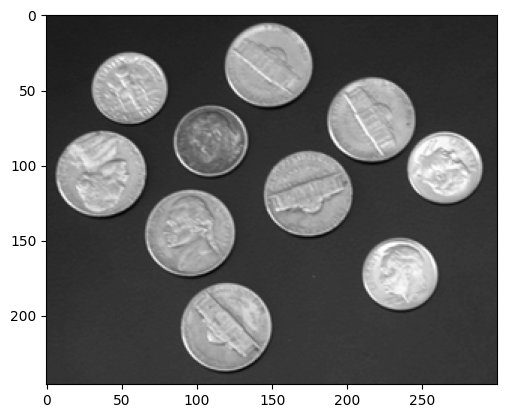

In [ ]:
plt.imshow(np.reshape(coins[0],coins[1]), cmap = "gray" )

In [ ]:
coins_gauss_filtered

array([[23, 31, 33, ..., 39, 36, 27],
       [31, 42, 45, ..., 52, 49, 36],
       [33, 45, 48, ..., 55, 52, 39],
       ...,
       [48, 65, 69, ..., 69, 65, 48],
       [45, 61, 65, ..., 66, 62, 46],
       [33, 45, 48, ..., 49, 46, 34]])

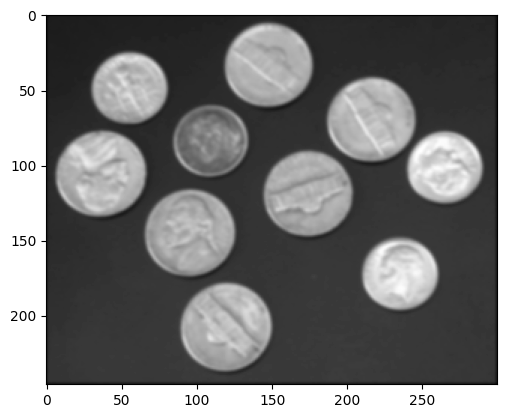

In [ ]:
plt.imshow(coins_gauss_filtered, cmap = "gray")

In [ ]:
kernel_sizes = [3, 5, 7]
sigmas = [1, 5]

In [ ]:
duos = [(a, b) for a in kernel_sizes for b in sigmas]

In [ ]:
for i in duos:
  coins_filtered = gauss_filter(coins[0].reshape(coins[1]), size = i[0], sigma = i[1])
  print(f"with kernek {i[0]}x{i[0]} and sigma {i[1]}")
  plt.figure()
  plt.imshow(coins_filtered)
  plt.show()

In [ ]:
def sobel_filter(image):
    gx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

    gy = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

    height, width = image.shape

    filtered_image = np.zeros_like(image, dtype=float)
    filtered_image_gx = np.zeros_like(image, dtype=float)
    filtered_image_gy = np.zeros_like(image, dtype=float)

    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    # Yatay ve dikey kenarlar
    for i in range(1, height + 1):
        for j in range(1, width + 1):
            region = padded_image[i - 1:i + 2, j - 1:j + 2]

            gradient_x = np.sum(region * gx)
            gradient_y = np.sum(region * gy)

            magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

            filtered_image[i - 1, j - 1] = magnitude
            filtered_image_gy[i - 1, j - 1] = gradient_y
            filtered_image_gx[i - 1, j - 1] = gradient_x

    return filtered_image, filtered_image_gx, filtered_image_gy


In [ ]:
np.pad(np.reshape(coins[0], coins[1]), ((1, 1), (1, 1)), mode='constant')[0:3,0:3] #zero padding
# ilk 49 dan başlanakca.

array([[ 0,  0,  0],
       [ 0, 49, 50],
       [ 0, 47, 47]])

In [ ]:
filtered_image, filtered_image_gx, filtered_image_gy = sobel_filter(np.reshape(coins[0], coins[1]))

In [ ]:
np.reshape(coins[0], coins[1])

array([[49, 50, 48, ..., 58, 55, 55],
       [47, 47, 49, ..., 56, 57, 55],
       [48, 48, 49, ..., 57, 56, 57],
       ...,
       [71, 70, 70, ..., 70, 69, 70],
       [69, 71, 71, ..., 70, 72, 71],
       [69, 68, 69, ..., 71, 72, 71]])

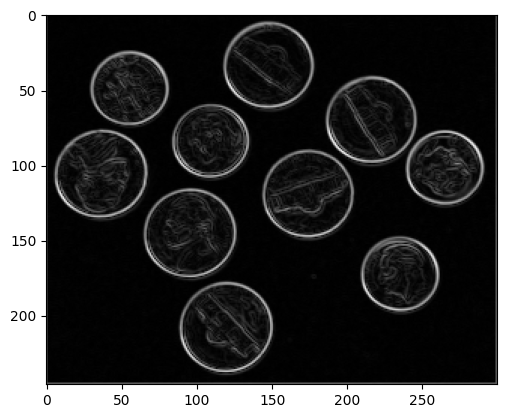

In [ ]:
  plt.figure()
  plt.imshow(filtered_image, cmap = "gray")
  plt.show()

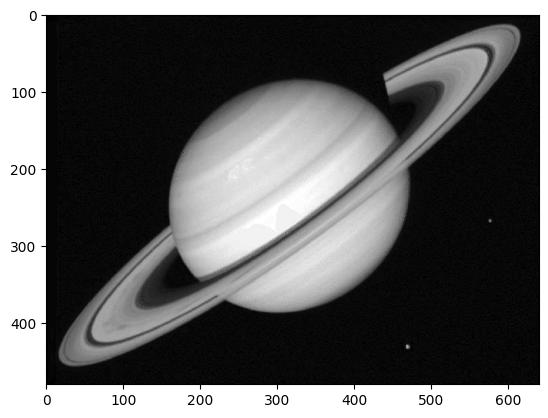

In [ ]:
saturn = readpgm(SATURN_PATH)

plt.imshow(np.reshape(saturn[0],saturn[1]), cmap = "gray")

In [ ]:
filtered_image_saturn, gx, gy,  = sobel_filter(np.reshape(saturn[0],saturn[1]))

# Saturn İşlemleri

## Gx, Gy, Sober Filtered

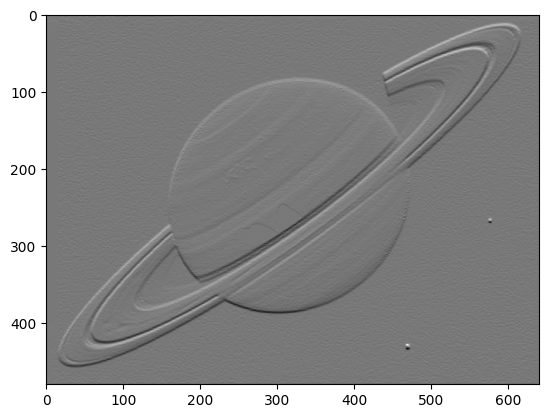

In [ ]:
  #gy Sober
  plt.figure()
  plt.imshow(gy, cmap = "gray")
  plt.show()

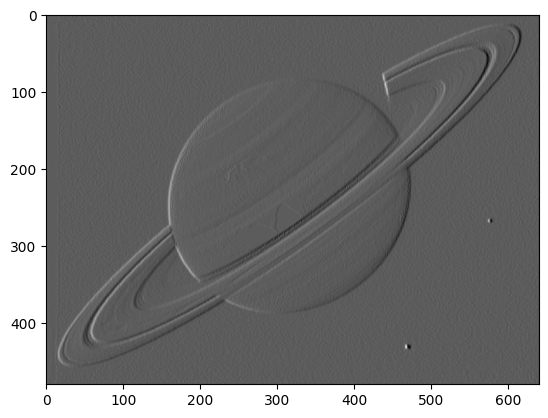

In [ ]:
  #gx Sober
  plt.figure()
  plt.imshow(gx, cmap = "gray")
  plt.show()

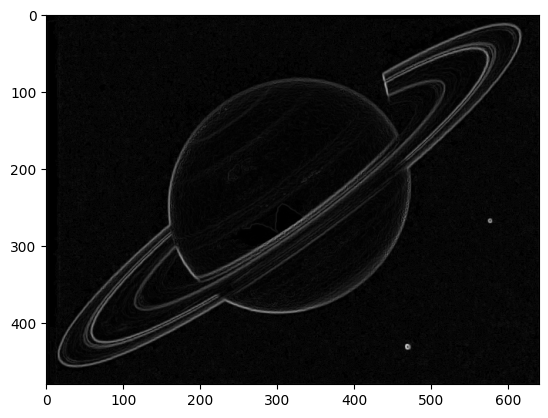

In [ ]:
  #Filtered Sober
  plt.figure()
  plt.imshow(filtered_image_saturn, cmap = "gray")
  plt.show()

## Most Blurry to Sobel Filter (Saturn)


In [ ]:
for i in duos:
  saturn_filtered = gauss_filter(saturn[0].reshape(saturn[1]), size = i[0], sigma = i[1])
  print(f"with kernek {i[0]}x{i[0]} and sigma {i[1]}")
  plt.figure()
  plt.imshow(saturn_filtered, cmap = "gray")
  plt.show() # with 7x7 ve sigma 5 most blurry

In [ ]:
saturn_filtered = gauss_filter(saturn[0].reshape(saturn[1]), size = 7, sigma = 5)

In [ ]:
filtered_image_saturn, *gxy = sobel_filter(saturn_filtered)

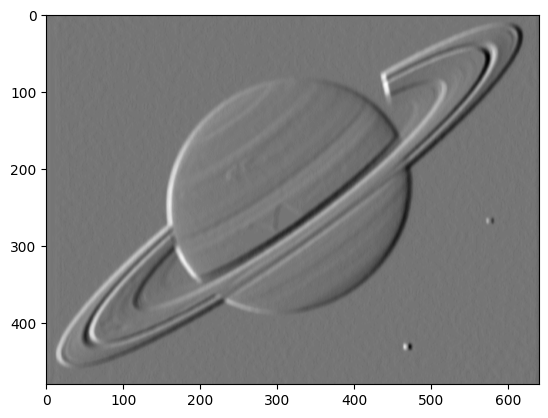

In [ ]:
  #Most blurry saturn sobel filtered
  plt.figure()
  plt.imshow(gxy[0], cmap = "gray")
  plt.show()

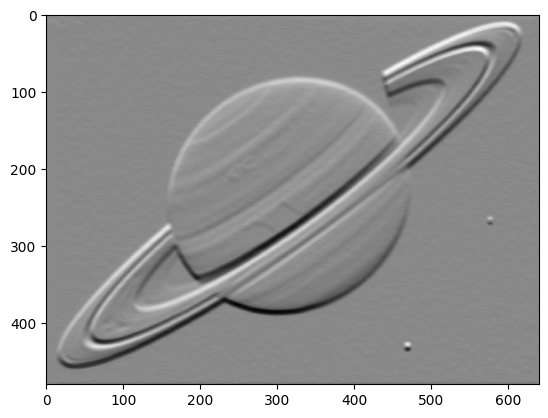

In [ ]:
  #Most blurry saturn sobel filtered
  plt.figure()
  plt.imshow(gxy[1], cmap = "gray")
  plt.show()

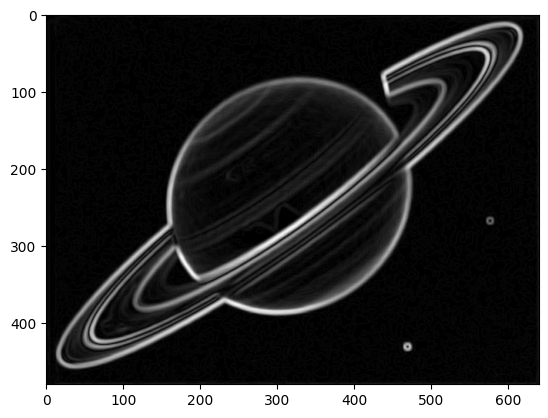

In [ ]:
  #Most blurry saturn sobel filtered
  plt.figure()
  plt.imshow(filtered_image_saturn, cmap = "gray")
  plt.show()

# Coin Filters

In [ ]:
coins_filtered = gauss_filter(coins[0].reshape(coins[1]), size = 7, sigma = 5)

In [ ]:
filtered_image_coin, *gxy = sobel_filter(coins_filtered)

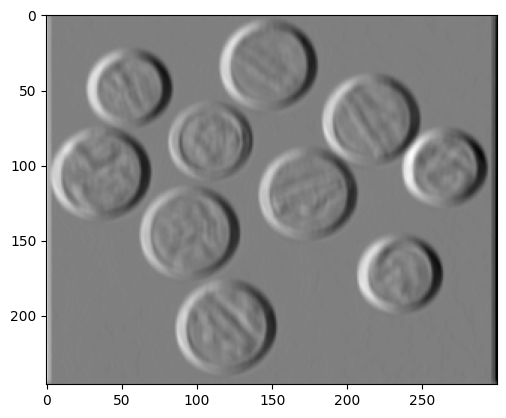

In [ ]:
  #Most blurry coin sobel filtered
  plt.figure()
  plt.imshow(gxy[0], cmap = "gray")
  plt.show()

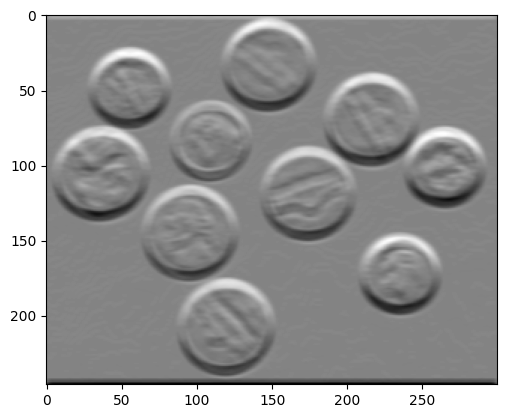

In [ ]:
  #Most blurry coin sobel filtered
  plt.figure()
  plt.imshow(gxy[1], cmap = "gray")
  plt.show()

In [ ]:
  #Most blurry coin sobel filtered
  plt.figure()
  plt.imshow(filtered_image_coin, cmap = "gray")
  plt.show()

In [131]:
!